# Scatter Plot

This notebook shows the various different way of setting up a scatter plot, from simple to more advanced techniques.

## Setup

Let's first set up the notebook for the proper imports and configurations. The line `%matplotlib inline` is a [line magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html) that tells Juypter to render Matplot plots in a cell immediately after a code cell. Seaborn just makes plots spiffy.

We also load a [sample data (aka toy dataset)](https://scikit-learn.org/stable/datasets/toy_dataset.html) from Scikit-learn. In particular, we load the [Iris plants dataset](https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset) as it's a simple, relevant dataset for a scatter plot.

In [39]:
# Setup

%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import seaborn as sns

sns.set(style="darkgrid")

# Load data
iris = load_iris()
X, y = iris.data, iris.target

## Simple Scatter Plot

We use 1 line of code to plot a scatter from the dataset. The 3 key parameters to the function are:

* x, y = the first 2 variables are the data points `x`, `y`.
* c = the list of colors, we pass the third variable `target`.

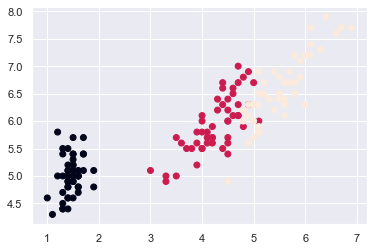

In [40]:
plt.scatter(X[:, 2],X[:, 0], c=y)
plt.show()

Let's improve by adding the following to the code:

 * a color bar to indicate the range of the `target`.
 * `cmap` is the colormap to use. Pick up with the right contrast and color palette. Usually `viridis` works.
 * `alpha` sets the transparency of the markers.
 * `marker` denotes the shape of the makers. Default is `o`. Other good marker shapes to use: `.` (point), `s` (square), `*` (star), `x` (x), and `D` (diamond).

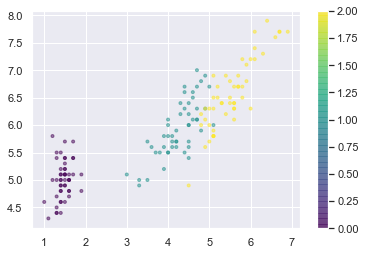

In [41]:
plt.scatter(X[:, 2],X[:, 0], c=y, alpha=0.5, marker='.', cmap='viridis')
plt.colorbar()
plt.show()

## Full Scatter Plot

Let's expand on what we have already built and make the plot better for presentation.

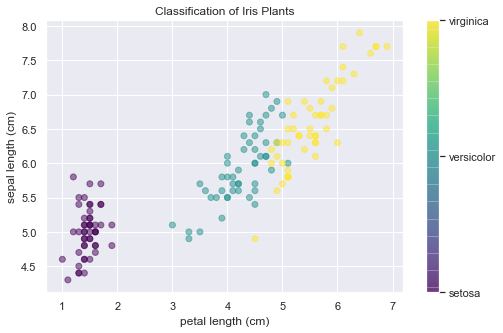

In [42]:
# Control the aspect ratio of the plot.
plt.figure(figsize=(8, 5))

# Initialize the plot.
plt.scatter(X[:, 2],X[:, 0], c=y, alpha=0.5, marker='o', cmap='viridis')

# Label the title.
plt.title('Classification of Iris Plants')

# Label the axes.
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[0])

# Label the color bar.
# The target data is discrete with 0 = setosa, 1 = versicolor, 2 = virginica.
labels = iris.target_names
formatter = plt.FuncFormatter(lambda k, *args: labels[k])
plt.colorbar(ticks=[0, 1, 2], format=formatter)

plt.show()

## Multiple Scatter Plots

So far, we plot petal length vs sepal length. There are 2 other X datasets. Let's plot them all to see their relationships.

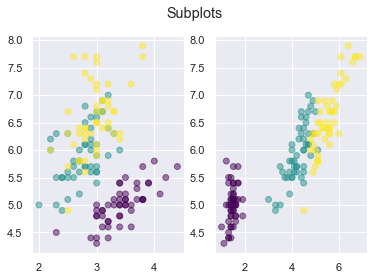

In [43]:
# Stack the plots horizontally
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Subplots')
ax1.scatter(X[:, 1],X[:, 0], c=y, alpha=0.5, marker='o', cmap='viridis')
ax2.scatter(X[:, 2],X[:, 0], c=y, alpha=0.5, marker='o', cmap='viridis')

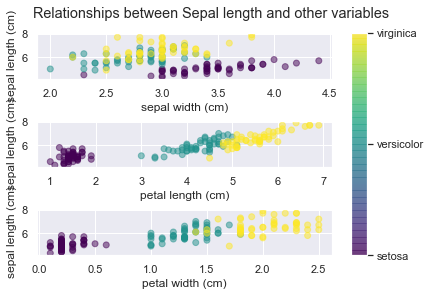

In [44]:
# Do a 3x1 scatter plot.
# `constrained_layout` to adjust the subplots automatically.
fig, axes = plt.subplots(3, 1, sharey=True, constrained_layout = True)
fig.suptitle('Relationships between Sepal length and other variables')

# Iterate and plot each axis.
for i, ax in enumerate(axes.flat):
    X1 = X[:, i+1]
    X2 = X[:, 0]
    im = ax.scatter(X1, X2, c=y, alpha=0.5, cmap='viridis')
    ax.set(xlabel=iris.feature_names[i+1], ylabel=iris.feature_names[0])

# Shared color bar among the subplots.
labels = iris.target_names
formatter = plt.FuncFormatter(lambda k, *args: labels[k])
plt.colorbar(im, ax=axes.ravel().tolist(), ticks=[0, 1, 2], format=formatter)

plt.show()

# References

* [Function reference: matplotlib.pyplot.scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html)